# 2- Organizing analysis
In general, when doing analysis, it is often frame-by-frame, or case-by-case, where  we'll want to sequentially add to a dataframe.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Let's generate some data to analyze by calculating an increasing number of random numbers each pass through the loop.   On each loop, we will calculate the mean and standard deviation of the data points which we will save as a dictionary, along with the original array  of random points.  This will be appended to the list ```overall_dict``` which will be convered to a dataframe (```df```). 

In [2]:
np.random.seed(123)

overall = np.array([])

#number of random samples to generate at a time
num_rand = 10
overall_dict = []

#generate some data
for t in range(1,20):
    # create a sequence of normally distributed random points with mean of zero and stdev of 1
    a =  np.random.randn(num_rand*t)
    
    to_df = {'n_samples': t*num_rand, 'mean': a.mean(), 'stdev': a.std(), 'array': a}
    overall_dict.append(to_df)

df = pd.DataFrame(data=overall_dict)

In [3]:
df

,n_samples,mean,stdev,array
0,10,-0.269516,1.236305,"[-1.0856306033005612, 0.9973454465835858, 0.28..."
1,20,0.201829,1.097914,"[-0.6788861516220543, -0.09470896893689112, 1...."
2,30,0.141485,1.211934,"[-0.2556193705305969, -2.7985891054607244, -1...."
3,40,-0.071877,1.019332,"[-0.7727087142471915, 0.7948626677932181, 0.31..."
4,50,0.119164,1.007492,"[0.6420546892718314, -1.977887931520449, 0.712..."
5,60,-0.099148,0.905821,"[0.25381647654962736, 0.2837253557710373, -1.4..."
6,70,-0.089828,0.949395,"[0.5795416155732297, 0.5796897791443336, -0.27..."
7,80,-0.163384,0.952591,"[-1.2511898734731952, -1.1843273385116637, -1...."
8,90,-0.065171,0.940334,"[-0.40141442845701475, 0.6734912780983248, -0...."
9,100,0.036462,1.040743,"[0.12938552377648257, -1.2625437427838198, -1...."


Again, ```info``` can give us a quick overview.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   n_samples  19 non-null     int64  
 1   mean       19 non-null     float64
 2   stdev      19 non-null     float64
 3   array      19 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 736.0+ bytes


As before we can easily examine this data. This returns a series (1-d data).

In [5]:
df['mean']

0    -0.269516
1     0.201829
2     0.141485
3    -0.071877
4     0.119164
5    -0.099148
6    -0.089828
7    -0.163384
8    -0.065171
9     0.036462
10    0.071714
11    0.017965
12   -0.114128
13   -0.149525
14    0.053132
15    0.022301
16    0.088374
17   -0.063592
18   -0.048474
Name: mean, dtype: float64

Since we saved the array, we can easily recalculate the mean for each row, which is identical to what we have saved in the ```mean``` column of the df. 

In [6]:
for i, entry in enumerate(df['array']):
    print(entry.mean(), df['mean'][i])

-0.26951611032632805 -0.26951611032632805
0.20182901160596964 0.20182901160596964
0.14148524871966553 0.14148524871966553
-0.07187673103525263 -0.07187673103525263
0.11916383560086181 0.11916383560086181
-0.09914770146868501 -0.09914770146868501
-0.08982844515135496 -0.08982844515135496
-0.1633835491349654 -0.1633835491349654
-0.06517139762540937 -0.06517139762540937
0.03646207561621033 0.03646207561621033
0.07171414400268049 0.07171414400268049
0.017965032812876883 0.017965032812876883
-0.1141280405173572 -0.1141280405173572
-0.14952543318358122 -0.14952543318358122
0.05313217663796115 0.05313217663796115
0.02230137885516832 0.02230137885516832
0.0883742240784683 0.0883742240784683
-0.0635919029020288 -0.0635919029020288
-0.04847358295861706 -0.04847358295861706


We can do lots of indexing here as well, e.g., looking at the first 10 data points in the 10th entry. 

In [7]:
print(df['array'][9][0:10].mean())

-0.05053216047999394


We can easily extract the data for plotting.

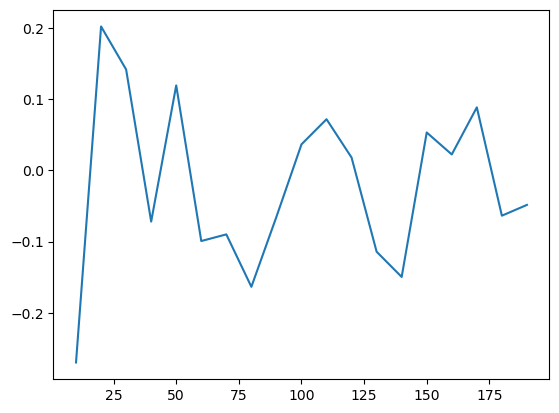

In [8]:
mean_values = df['mean']
num_samples = df['n_samples']
plt.plot(num_samples, mean_values)

This dataframe can be trivially saved to a csv file, as we saw in the last example.

In [9]:
df.to_csv('test_data.csv', columns=['n_samples', 'mean',
                                        'stdev', 'array'])

We can easily remove information too, by simply excluding ```array``` from the columns we pass; we can also reorder the columns during output. 

In [10]:
df.to_csv('test_data_trimmed.csv', columns=['n_samples', 
                                        'stdev', 'mean'])

Let us try reading the csv file back in and can easily query it the same way as before.

In [11]:
df_in = pd.read_csv('test_data_trimmed.csv',index_col=0)

In [12]:
df_in

,n_samples,stdev,mean
0,10,1.236305,-0.269516
1,20,1.097914,0.201829
2,30,1.211934,0.141485
3,40,1.019332,-0.071877
4,50,1.007492,0.119164
5,60,0.905821,-0.099148
6,70,0.949395,-0.089828
7,80,0.952591,-0.163384
8,90,0.940334,-0.065171
9,100,1.040743,0.036462


## Using pandas to manipulate data

Pandas provides some very useful functions, including the ability to group data. Let us make some ficticious data for energy measured at different temperatures. In this data series, the same temperatures (1.0, 1.5, and 2.0) are repeated multiple times; this is likely to happen in the real world in that we like to have multiple indpendent replicates at the same statepoint. 

In [13]:
df = pd.DataFrame({'temp': [1.0, 1.5, 2.0, 1.0, 1.5, 2.0, 1.0, 1.5, 2.0],
                    'energy': [129, 523, 1201, 131, 503, 1301, 103, 491, 1132]})

In [14]:
df

,temp,energy
0,1.0,129
1,1.5,523
2,2.0,1201
3,1.0,131
4,1.5,503
5,2.0,1301
6,1.0,103
7,1.5,491
8,2.0,1132


We can use the ```groupby``` function to have pandas report the mean for each temperature without having to actually write any loops to sort the data. 

In [15]:
df_mean = df.groupby('temp').mean()
df_mean

,energy
temp,
1.0,121.000000
1.5,505.666667
2.0,1211.333333


The ```value_counts``` function gives us details about the groups.

In [16]:
df.groupby('temp').value_counts()

temp  energy
1.0   103       1
      129       1
      131       1
1.5   491       1
      503       1
      523       1
2.0   1132      1
      1201      1
      1301      1
Name: count, dtype: int64

Just for fun, we could make a pie chart; it's not very exciting because we have equal amounts of each temperature. 

<AxesSubplot: ylabel='count'>

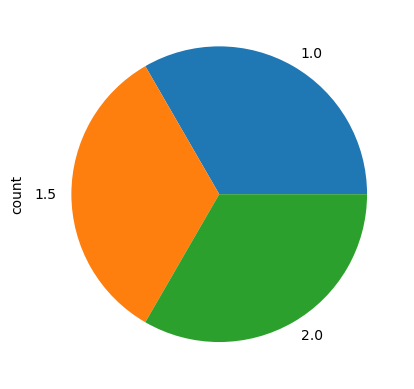

In [17]:
df['temp'].value_counts().plot(kind='pie')

We can rename the energy colmumn to reflect that it is now the mean, simply by passing a dictionary where the key is the old name and the value is the new name.

In [18]:
df_mean = df_mean.rename(columns={'energy': 'energy_mean'})
df_mean

,energy_mean
temp,
1.0,121.000000
1.5,505.666667
2.0,1211.333333


We can use the ```size``` function to see the size of each group that was found (note, this returns a series, not a dataframe.

In [19]:
df.groupby('temp').size()

temp
1.0    3
1.5    3
2.0    3
dtype: int64

An alternative syntax to selectively get the same basic info, similar to what was shown in the prior tutorial.

In [20]:
df.loc[df['temp'] == 1.0, 'energy'].mean()

121.0

We can use the same procedure to calculate the standard deviation of the mean and rename the column.

In [21]:
df_std = df.groupby('temp').std().rename(columns={'energy': 'energy_std'})

### Merging dataframes
We can then merge these two dataframes together using the ```join``` command.  The ```join``` command in a dataframe takes as input a series.  Note in the example below, df_mean remains unchanged after calling ```join``` and instead returns a new dataframe. 

In [22]:
df_new = df_mean.join(df_std['energy_std'])
df_new

,energy_mean,energy_std
temp,,
1.0,121.000000,15.620499
1.5,505.666667,16.165808
2.0,1211.333333,84.972545


And just for fun we can take all these functions and put them into a single line that is rather challenging to read. 

In [23]:
df_new2 = df.groupby('temp').mean().rename(columns={'energy': 'energy_mean'}).join(df.groupby('temp').std().rename(columns={'energy': 'energy_std'})['energy_std'])

In [24]:
df_new2

,energy_mean,energy_std
temp,,
1.0,121.000000,15.620499
1.5,505.666667,16.165808
2.0,1211.333333,84.972545


We can easily add in columns that are operations on the data.  For example, creating a column for the square of the mean energy.

In [25]:
df_new2['e_sq'] = df_new2['energy_mean']*df_new2['energy_mean']

In [26]:
df_new2

,energy_mean,energy_std,e_sq
temp,,,
1.0,121.000000,15.620499,1.464100e+04
1.5,505.666667,16.165808,2.556988e+05
2.0,1211.333333,84.972545,1.467328e+06


Or other math operations

In [27]:
df_new2['e/2'] = df_new2['energy_mean']/2
df_new2['e_sq'] *=1.5
df_new2

,energy_mean,energy_std,e_sq,e/2
temp,,,,
1.0,121.000000,15.620499,2.196150e+04,60.500000
1.5,505.666667,16.165808,3.835482e+05,252.833333
2.0,1211.333333,84.972545,2.200993e+06,605.666667
